In [ ]:
!pip install sounddevice wavio


In [ ]:
!apt-get install -y libportaudio2
!pip install --upgrade sounddevice

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 65.3 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Fetched 65.3 kB in 1s (104 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../libportaudio2_19.6.0-1.1_amd64.deb ...
Unpacking libportaudio2:amd64 (19.6.0-1.1) ...
Setting up libportaudio2:amd64 (19.6.0-1.1) ...
Processing triggers for libc-bin (2.35-0ubuntu3.8) ...
/sbin/ldconfig.real: /usr/local/lib/libtbbbind_2_0.so.3 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtbb.so.12 is not a symbolic link

/sbin/ldconfig.real: /usr/local/lib/libtcm

In [ ]:
import os

data_dir = '/content/drive/MyDrive/Audio Data'  # Path to the directory containing audio files

# Iterate through items (files and directories) within data_dir
for item in os.listdir(data_dir):
    item_path = os.path.join(data_dir, item)

    # Check if the item is a file and has a .wav extension
    if os.path.isfile(item_path) and item_path.lower().endswith('.wav'):
        print(f"Found audio file: {item_path}")
        # Perform actions on the audio file, like playing it using IPython.display.Audio
        # ...

    # Check if the item is a directory
    elif os.path.isdir(item_path):
        num_files = len(os.listdir(item_path))
        print(f"{item}: {num_files} files")
        # You can further process subdirectories or files within them if needed

Found audio file: /content/drive/MyDrive/Audio Data/A10_1.wav
Found audio file: /content/drive/MyDrive/Audio Data/A10_10.wav
Found audio file: /content/drive/MyDrive/Audio Data/A10_2.wav
Found audio file: /content/drive/MyDrive/Audio Data/A10_3.wav
Found audio file: /content/drive/MyDrive/Audio Data/A10_4.wav
Found audio file: /content/drive/MyDrive/Audio Data/A10_5.wav
Found audio file: /content/drive/MyDrive/Audio Data/A10_7.wav
Found audio file: /content/drive/MyDrive/Audio Data/A10_6.wav
Found audio file: /content/drive/MyDrive/Audio Data/A11_1.wav
Found audio file: /content/drive/MyDrive/Audio Data/A10_8.wav
Found audio file: /content/drive/MyDrive/Audio Data/A10_9.wav
Found audio file: /content/drive/MyDrive/Audio Data/A11_4.wav
Found audio file: /content/drive/MyDrive/Audio Data/A11_2.wav
Found audio file: /content/drive/MyDrive/Audio Data/A11_3.wav
Found audio file: /content/drive/MyDrive/Audio Data/A11_10.wav
Found audio file: /content/drive/MyDrive/Audio Data/A11_7.wav
Found 

In [ ]:
from IPython.display import Audio
import os

data_dir = '/content/drive/MyDrive/Audio Data'  # Path to your audio data directory

# Assuming 'Hindi' directory is at the top level of the downloaded data
hindi_dir = os.path.join(data_dir, 'Hindi')  # Replace 'Hindi' with the actual folder name if different

# Make sure the directory exists before proceeding
if os.path.isdir(hindi_dir):
    file_path = os.path.join(hindi_dir, os.listdir(hindi_dir)[0])
    Audio(file_path)
else:
    print(f"Error: Hindi directory not found at {hindi_dir}")

Error: Hindi directory not found at /content/drive/MyDrive/Audio Data/Hindi


In [ ]:
import os
import glob
import numpy as np
import librosa
from tqdm import tqdm

def extract_feature(file_name, **kwargs):
    mfcc = kwargs.get("mfcc", False)
    chroma = kwargs.get("chroma", False)
    mel = kwargs.get("mel", False)
    contrast = kwargs.get("contrast", False)
    tonnetz = kwargs.get("tonnetz", False)

    X, sample_rate = librosa.load(file_name)
    result = np.array([])

    if chroma or contrast:
        stft = np.abs(librosa.stft(X))

    if mfcc:
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
        result = np.hstack((result, mfccs))

    if chroma:
        chroma_feat = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
        result = np.hstack((result, chroma_feat))

    if mel:
        mel_spec = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T, axis=0)
        result = np.hstack((result, mel_spec))

    if contrast:
        contrast_feat = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T, axis=0)
        result = np.hstack((result, contrast_feat))

    if tonnetz:
        tonnetz_feat = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T, axis=0)
        result = np.hstack((result, tonnetz_feat))

    return result

# Directory containing audio files (can be nested)
audio_root = "/content/drive/MyDrive/Audio Data"
output_dir = "features"

os.makedirs(output_dir, exist_ok=True)

# Collect all .wav files
audio_files = glob.glob(os.path.join(audio_root, "**", "*.wav"), recursive=True)

print(f"[+] Found {len(audio_files)} audio files.")

for audio_path in tqdm(audio_files, desc="Extracting features"):
    try:
        features = extract_feature(audio_path, mel=True)  # Change features here
        rel_path = os.path.relpath(audio_path, audio_root)
        save_path = os.path.join(output_dir, os.path.splitext(rel_path)[0] + ".npy")
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        np.save(save_path, features)
    except Exception as e:
        print(f"[!] Error processing {audio_path}: {e}")

[+] Found 400 audio files.


Extracting features: 100%|██████████| 400/400 [02:32<00:00,  2.63it/s]


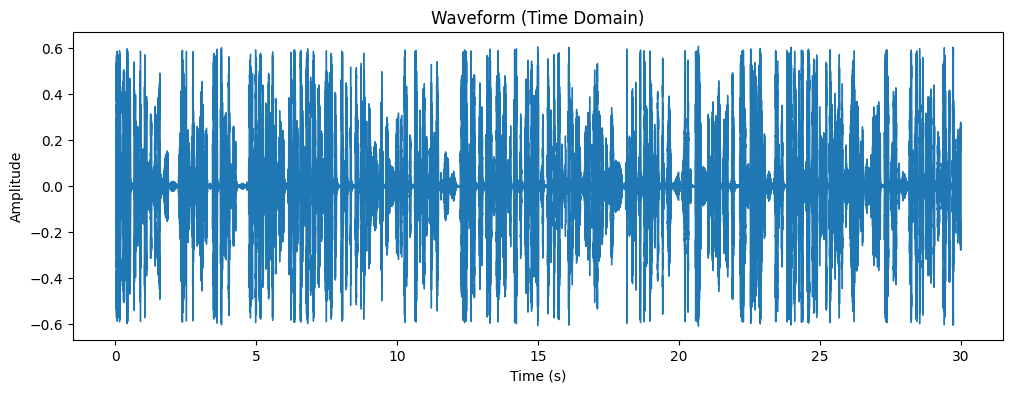

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

y, sr = librosa.load("/content/drive/MyDrive/Audio Data/A10_1.wav")

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


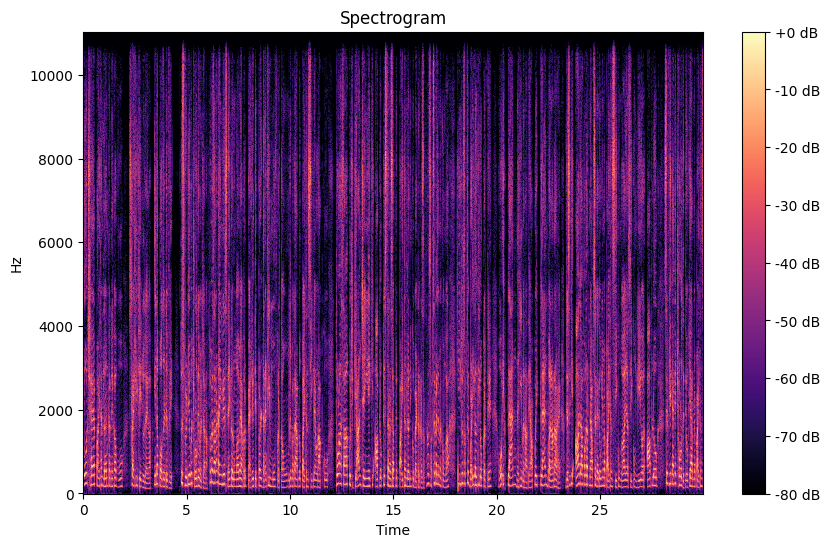

In [ ]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.show()


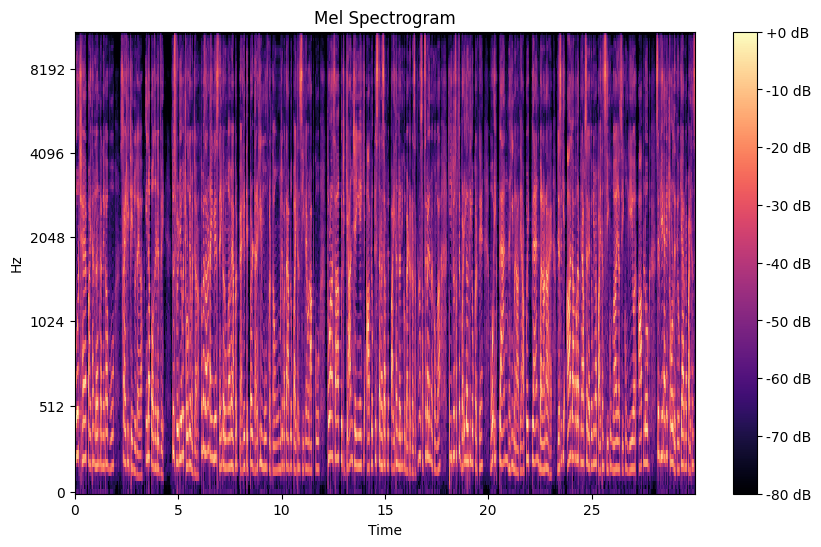

In [ ]:
mel = librosa.feature.melspectrogram(y=y, sr=sr)
mel_db = librosa.power_to_db(mel, ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(mel_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Mel Spectrogram")
plt.show()


In [ ]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import find_peaks

# Path to the folder containing the audio files
audio_folder = '/content/drive/MyDrive/Audio Data'

# Function to compute the dominant frequency of a signal
def get_dominant_freq(y, sr):
    n = len(y)
    yf = fft(y)
    yf = np.abs(yf[:n // 2])  # Keep only positive frequencies
    freqs = np.fft.fftfreq(n, 1/sr)[:n // 2]
    peak_idx = np.argmax(yf)
    return freqs[peak_idx]

# Loop through audio files and compute frequency
for root, dirs, files in os.walk(audio_folder):
    for file in files:
        if file.endswith(".wav"):
            file_path = os.path.join(root, file)
            try:
                y, sr = librosa.load(file_path, sr=None)
                dom_freq = get_dominant_freq(y, sr)
                print(f"{file} → Dominant Frequency: {dom_freq:.2f} Hz")
            except Exception as e:
                print(f"Failed to process {file}: {e}")


A10_1.wav → Dominant Frequency: 420.57 Hz
A10_10.wav → Dominant Frequency: 424.67 Hz
A10_2.wav → Dominant Frequency: 424.30 Hz
A10_3.wav → Dominant Frequency: 403.27 Hz
A10_4.wav → Dominant Frequency: 324.07 Hz
A10_5.wav → Dominant Frequency: 358.67 Hz
A10_7.wav → Dominant Frequency: 345.97 Hz
A10_6.wav → Dominant Frequency: 403.20 Hz
A11_1.wav → Dominant Frequency: 426.63 Hz
A10_8.wav → Dominant Frequency: 237.93 Hz
A10_9.wav → Dominant Frequency: 432.57 Hz
A11_4.wav → Dominant Frequency: 394.73 Hz
A11_2.wav → Dominant Frequency: 389.87 Hz
A11_3.wav → Dominant Frequency: 427.27 Hz
A11_10.wav → Dominant Frequency: 342.17 Hz
A11_7.wav → Dominant Frequency: 428.47 Hz
A11_6.wav → Dominant Frequency: 382.33 Hz
A11_5.wav → Dominant Frequency: 426.03 Hz
A12_1.wav → Dominant Frequency: 515.33 Hz
A11_8.wav → Dominant Frequency: 430.93 Hz
A12_10.wav → Dominant Frequency: 463.47 Hz
A11_9.wav → Dominant Frequency: 426.57 Hz
A12_2.wav → Dominant Frequency: 569.30 Hz
A12_3.wav → Dominant Frequency:

In [ ]:
!pip install librosa scikit-learn matplotlib seaborn


In [ ]:
!pip install SpeechRecognition googletrans==4.0.0-rc1

import speech_recognition as sr
from googletrans import Translator

def transcribe_and_translate(audio_file_path):
    """Transcribes audio and translates it to English."""

    # Initialize recognizer and translator
    recognizer = sr.Recognizer()
    translator = Translator()

    try:
        with sr.AudioFile(audio_file_path) as source:
            audio_data = recognizer.record(source)

            # Recognize speech (assuming it's Hindi)
            text = recognizer.recognize_google(audio_data, language="hi-IN")
            print(f"Recognized Text (Hindi): {text}")

            # Translate to English
            translated = translator.translate(text, src='hi', dest='en')
            print(f"Translated Text (English): {translated.text}")

    except sr.UnknownValueError:
        print("❌ Could not understand the audio.")
    except sr.RequestError as e:
        print(f"⚠️ Could not request results; {e}")
    except Exception as e:
        print(f"❗ Error: {e}")


# Example usage:
audio_file = "/content/drive/MyDrive/Audio Data/A10_1.wav"  # Replace with your audio file path
transcribe_and_translate(audio_file)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=242222db93ad3eff9b5d0c267c5f2d4db6330bcdeaf86f679e17231bcf078b9a
  Stored in directory: /root/.cache/pip/wheels/39/17/6f/66a045ea3d168826074691b4b787b8f324d3f646d755443fda
Successfully built googletrans
  Attempting uninstall: hyperfra

In [ ]:
!pip install SpeechRecognition googletrans==4.0.0-rc1

import speech_recognition as sr
from googletrans import Translator

def transcribe_and_translate(audio_file_path):
    """Transcribes audio and translates it to English."""

    # Initialize recognizer and translator
    recognizer = sr.Recognizer()
    translator = Translator()

    try:
        with sr.AudioFile(audio_file_path) as source:
            audio_data = recognizer.record(source)

            # Recognize speech (assuming it's Hindi)
            text = recognizer.recognize_google(audio_data, language="hi-IN")
            print(f"Recognized Text (Hindi): {text}")

            # Translate to English
            translated = translator.translate(text, src='hi', dest='en')
            print(f"Translated Text (English): {translated.text}")

    except sr.UnknownValueError:
        print("❌ Could not understand the audio.")
    except sr.RequestError as e:
        print(f"⚠️ Could not request results; {e}")
    except Exception as e:
        print(f"❗ Error: {e}")


# Example usage:
audio_file = "/content/drive/MyDrive/Audio Data/A10_1.wav"  # Replace with your audio file path
transcribe_and_translate(audio_file)

Recognized Text (Hindi): 96 पाइथन लर्न करने का वह स्लाइटली चेंज हो जाएगा इन ए पॉजिटिव वे तो इस वीडियो को छोड़कर मत जाना टाइम वेस्ट नहीं करूंगा मैं यहां पर पहले टिप्पर डायरेक्टली मूव करता हूं मुझे पता है आप लोग पाइथन सीख रहे हैं और आपको थोड़ा सा कुछ ज्ञान चाहिए कि आप लोग किस तरह से अपने पाइथन लर्निंग को बेटर कर सकते हो सबसे पहले मैं कहूंगा कि जो सबसे बड़ी गलती लोग करते हैं वह एक प्लान नहीं बनाते आपको एक प्लान बनाना है जैसे कि आज आप अगर अपने आप से रहते हो कि मैं पाइथन सीख लूंगा या सीखूंगा और आप लोग सिर्फ मैं
Translated Text (English): The 96 Python Learn will change the slightly changes, they will not waste in these a positive, I will not waste time, I will do the first tipper directly move here.If you live by yourself that I will learn or learn Python and you guys only


In [ ]:
!pip install SpeechRecognition googletrans==4.0.0-rc1 nltk

import speech_recognition as sr
from googletrans import Translator
from nltk.translate.bleu_score import sentence_bleu

def transcribe_and_translate(audio_file_path, reference_translation):
    """Transcribes audio and translates it to English, then evaluates the translation accuracy."""

    # Initialize recognizer and translator
    recognizer = sr.Recognizer()
    translator = Translator()

    try:
        with sr.AudioFile(audio_file_path) as source:
            audio_data = recognizer.record(source)

            # Recognize speech (assuming it's Hindi)
            text = recognizer.recognize_google(audio_data, language="hi-IN")
            print(f"Recognized Text (Hindi): {text}")

            # Translate to English
            translated = translator.translate(text, src='hi', dest='en')
            print(f"Translated Text (English): {translated.text}")

            # Calculate BLEU score (compare translated text to reference translation)
            reference = [reference_translation.split()]  # BLEU expects a list of tokenized reference translations
            translated_tokens = translated.text.split()  # Tokenized translation
            bleu_score = sentence_bleu(reference, translated_tokens)

            print(f"BLEU Score for Translation Accuracy: {bleu_score}")

    except sr.UnknownValueError:
        print("❌ Could not understand the audio.")
    except sr.RequestError as e:
        print(f"⚠️ Could not request results; {e}")
    except Exception as e:
        print(f"❗ Error: {e}")

# Example usage:
audio_file = "/content/drive/MyDrive/Audio Data/A10_1.wav"  # Replace with your audio file path
reference_translation = "This is the reference English translation of the Hindi text."  # Replace with your ground truth
transcribe_and_translate(audio_file, reference_translation)


Recognized Text (Hindi): 96 पाइथन लर्न करने का वह स्लाइटली चेंज हो जाएगा इन ए पॉजिटिव वे तो इस वीडियो को छोड़कर मत जाना टाइम वेस्ट नहीं करूंगा मैं यहां पर पहले टिप्पर डायरेक्टली मूव करता हूं मुझे पता है आप लोग पाइथन सीख रहे हैं और आपको थोड़ा सा कुछ ज्ञान चाहिए कि आप लोग किस तरह से अपने पाइथन लर्निंग को बेटर कर सकते हो सबसे पहले मैं कहूंगा कि जो सबसे बड़ी गलती लोग करते हैं वह एक प्लान नहीं बनाते आपको एक प्लान बनाना है जैसे कि आज आप अगर अपने आप से रहते हो कि मैं पाइथन सीख लूंगा या सीखूंगा और आप लोग सिर्फ मैं
Translated Text (English): The 96 Python Learn will change the slightly changes, they will not waste in these a positive, I will not waste time, I will do the first tipper directly move here.If you live by yourself that I will learn or learn Python and you guys only
BLEU Score for Translation Accuracy: 8.319100378795605e-232


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

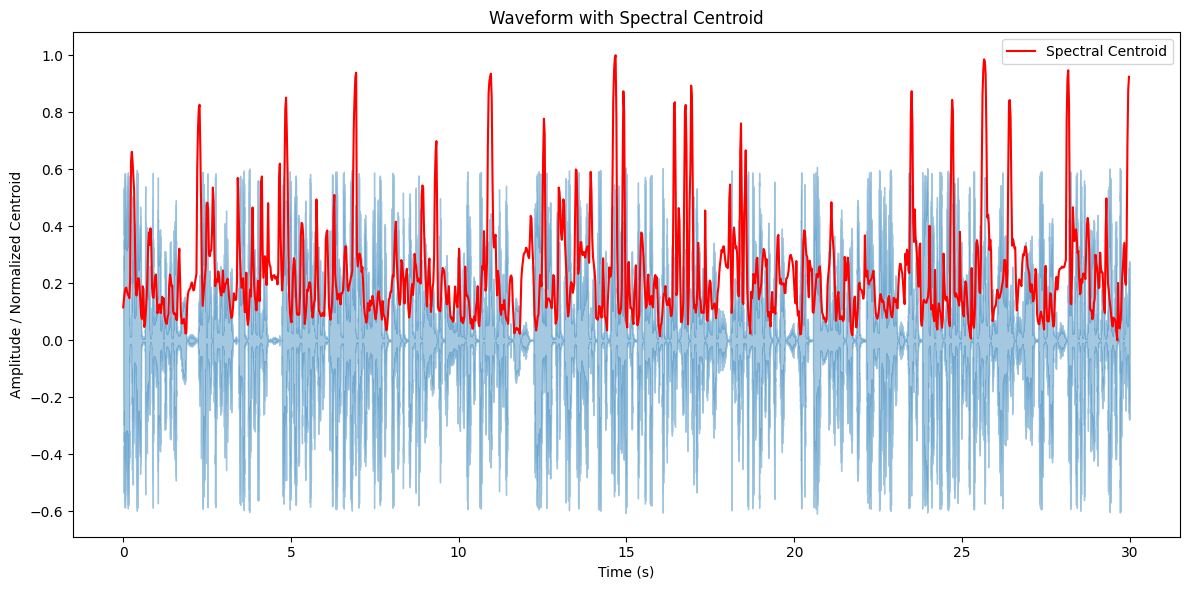

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import minmax_scale

# Load audio file
audio_path = '/content/drive/MyDrive/Audio Data/A10_1.wav'  # update as needed
x, sr = librosa.load(audio_path)

# Calculate spectral centroid
spectral_centroids = librosa.feature.spectral_centroid(y=x, sr=sr)[0]

# Time variable for plotting
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames, sr=sr)

# Normalize spectral centroid for visualization
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

# Plot
plt.figure(figsize=(12, 6))
librosa.display.waveshow(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r', label='Spectral Centroid')
plt.title("Waveform with Spectral Centroid")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude / Normalized Centroid")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
!pip install librosa matplotlib numpy


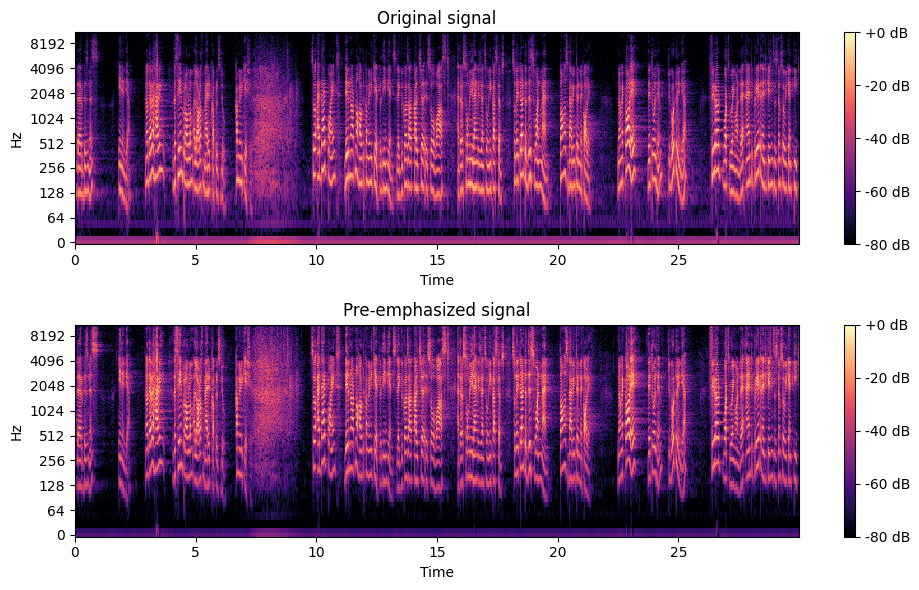

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
audio_path = '/content/drive/MyDrive/Audio Data/A19_8.wav'  # replace with your actual audio file path
y, sr = librosa.load(audio_path)

# Apply pre-emphasis filter
pre_emphasis = 0.97
y_preemphasized = np.append(y[0], y[1:] - pre_emphasis * y[:-1])

# Create spectrograms
D_original = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
D_preemphasized = librosa.amplitude_to_db(np.abs(librosa.stft(y_preemphasized)), ref=np.max)

# Plotting
plt.figure(figsize=(10, 6))

# Original signal
plt.subplot(2, 1, 1)
librosa.display.specshow(D_original, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.title('Original signal')
plt.colorbar(format='%+2.0f dB')

# Pre-emphasized signal
plt.subplot(2, 1, 2)
librosa.display.specshow(D_preemphasized, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.title('Pre-emphasized signal')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()


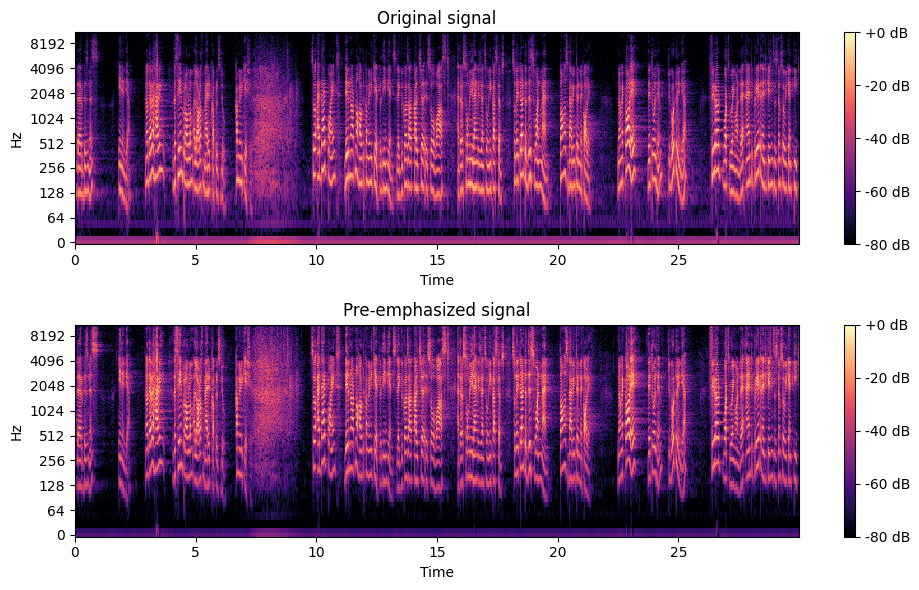

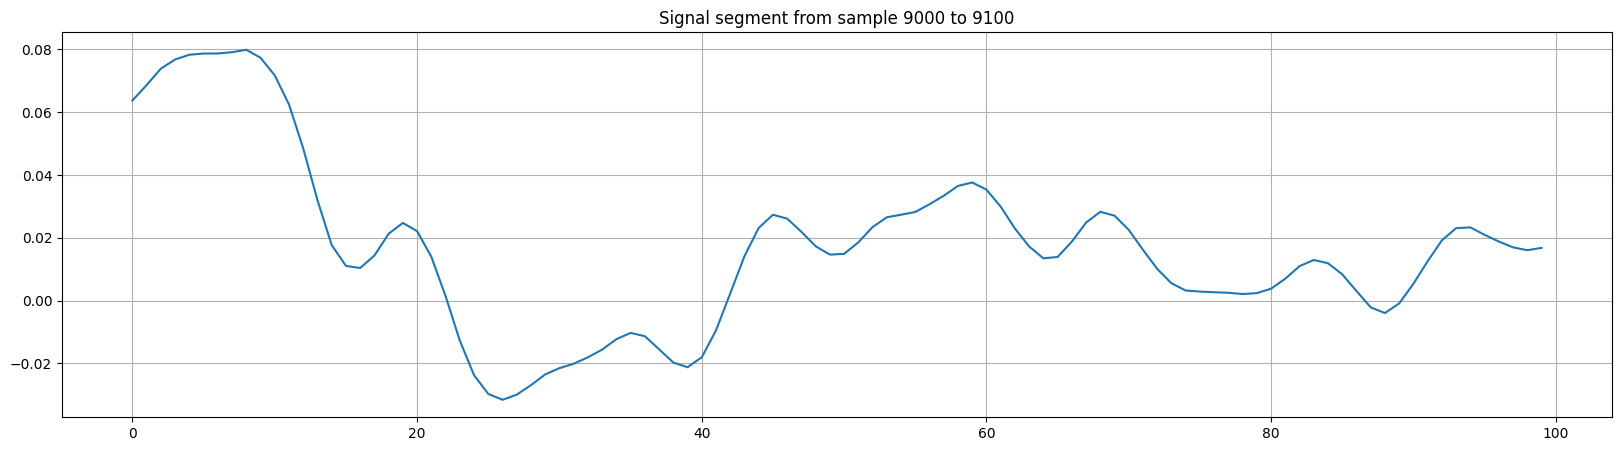

Number of zero crossings between 9000 and 9100: 4


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio
audio_path = '/content/drive/MyDrive/Audio Data/A19_8.wav'  # Replace with your actual file path
x, sr = librosa.load(audio_path)

# Apply pre-emphasis
pre_emphasis = 0.97
x_preemph = np.append(x[0], x[1:] - pre_emphasis * x[:-1])

# Spectrograms
D_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
D_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(x_preemph)), ref=np.max)

# Plot spectrograms
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(D_orig, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.title('Original signal')
plt.colorbar(format='%+2.0f dB')

plt.subplot(2, 1, 2)
librosa.display.specshow(D_preemph, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.title('Pre-emphasized signal')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

# Zero-crossings in a given time window
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.title("Signal segment from sample 9000 to 9100")
plt.grid()
plt.show()

# Zero crossing count
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(f"Number of zero crossings between {n0} and {n1}: {sum(zero_crossings)}")


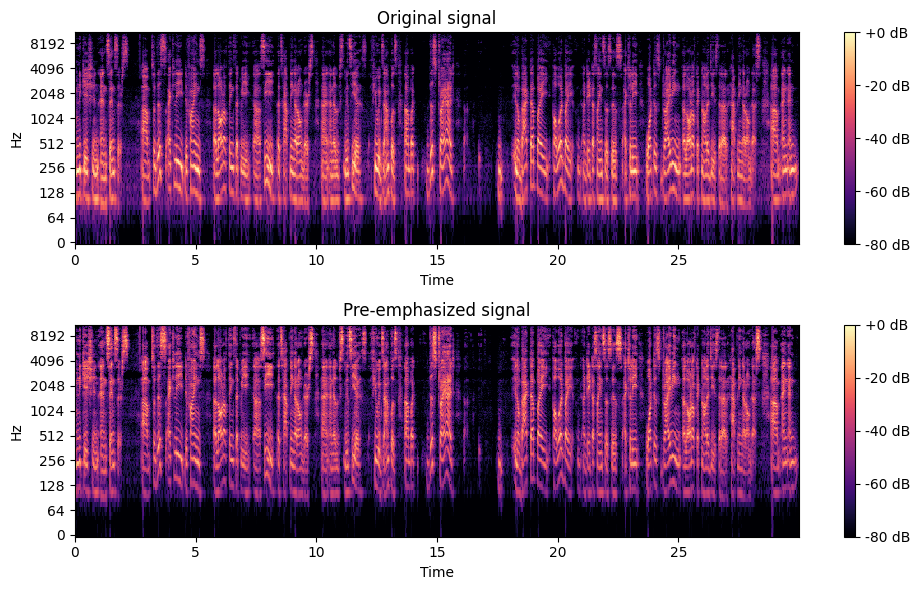

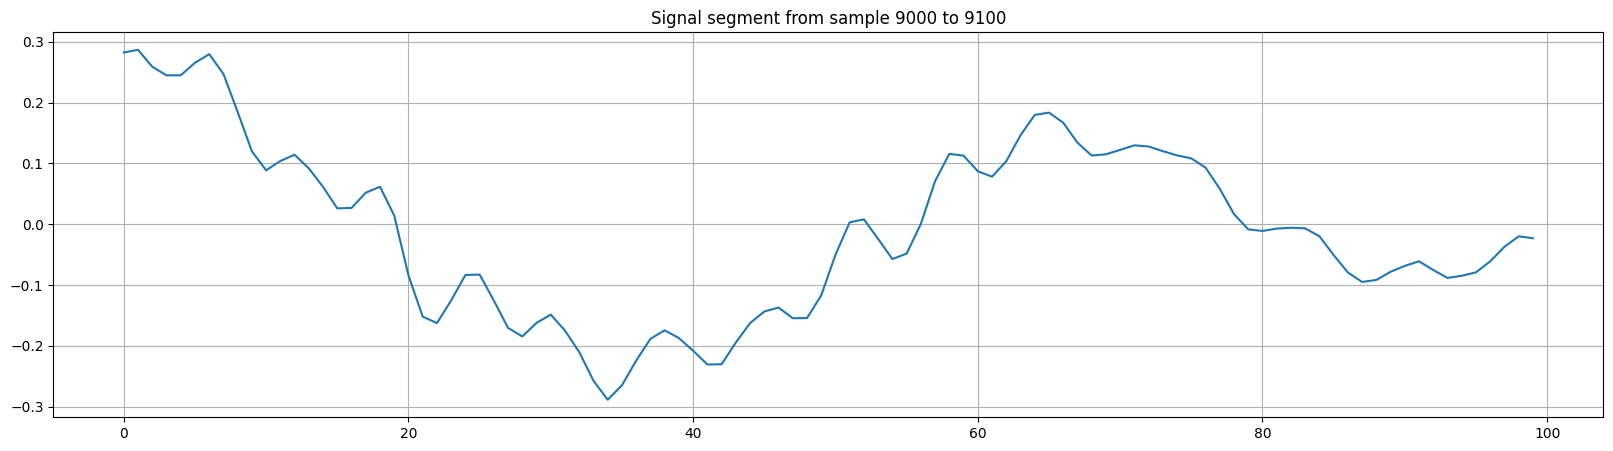

Number of zero crossings between 9000 and 9100: 5


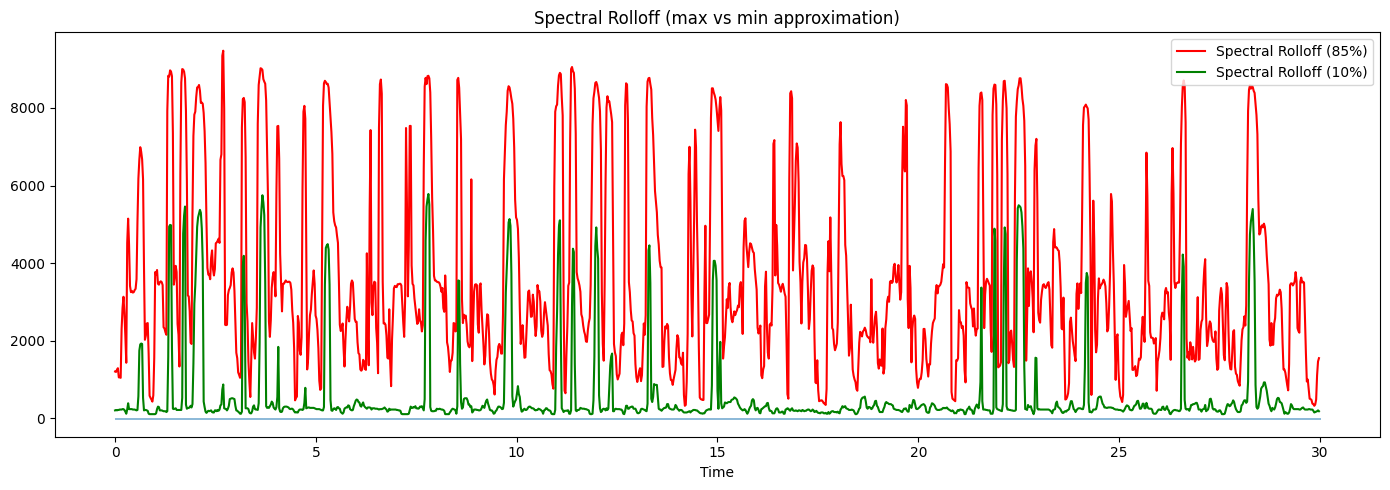

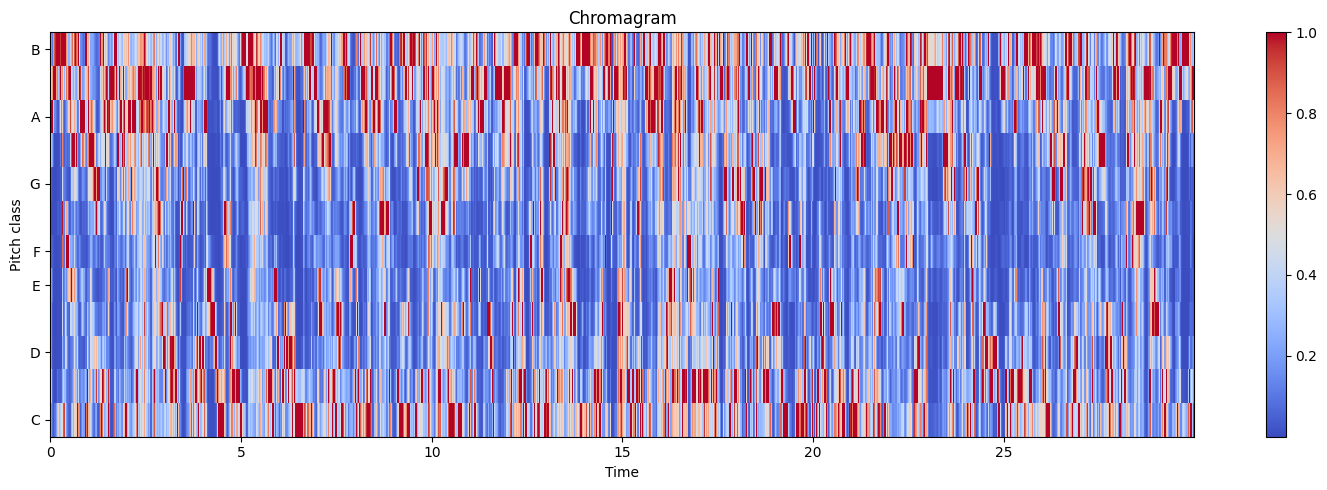

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio file
x, sr = librosa.load('/content/drive/MyDrive/Audio Data/A1_3.wav')  # Replace with your actual audio file

# Pre-emphasis
pre_emphasis = 0.97
x_preemph = np.append(x[0], x[1:] - pre_emphasis * x[:-1])

# Spectrograms
D_orig = librosa.amplitude_to_db(np.abs(librosa.stft(x)), ref=np.max)
D_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(x_preemph)), ref=np.max)

# Plot spectrograms
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
librosa.display.specshow(D_orig, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.title('Original signal')
plt.colorbar(format='%+2.0f dB')

plt.subplot(2, 1, 2)
librosa.display.specshow(D_preemph, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.title('Pre-emphasized signal')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

# Zero crossings
n0 = 9000
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.title("Signal segment from sample 9000 to 9100")
plt.grid()
plt.show()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(f"Number of zero crossings between {n0} and {n1}: {sum(zero_crossings)}")

# Spectral roll-off
rolloff_max = librosa.feature.spectral_rolloff(y=x, sr=sr)  # default 0.85
rolloff_min = librosa.feature.spectral_rolloff(y=x, sr=sr, roll_percent=0.1)

frames = range(len(rolloff_max[0]))
t = librosa.frames_to_time(frames, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr, alpha=0.5)
plt.plot(t, rolloff_max[0], label='Spectral Rolloff (85%)', color='r')
plt.plot(t, rolloff_min[0], label='Spectral Rolloff (10%)', color='g')
plt.title("Spectral Rolloff (max vs min approximation)")
plt.legend()
plt.tight_layout()
plt.show()

# Chroma feature extraction and visualization
hop_length = 512
# The 'x' variable should be passed as a keyword argument 'y'
chromagram = librosa.feature.chroma_stft(y=x, sr=sr, hop_length=hop_length)

plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.title("Chromagram")
plt.colorbar()
plt.tight_layout()
plt.show()

In [ ]:
!pip install nlpaug # Install the nlpaug library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 9.8 MB/s eta 0:00:00


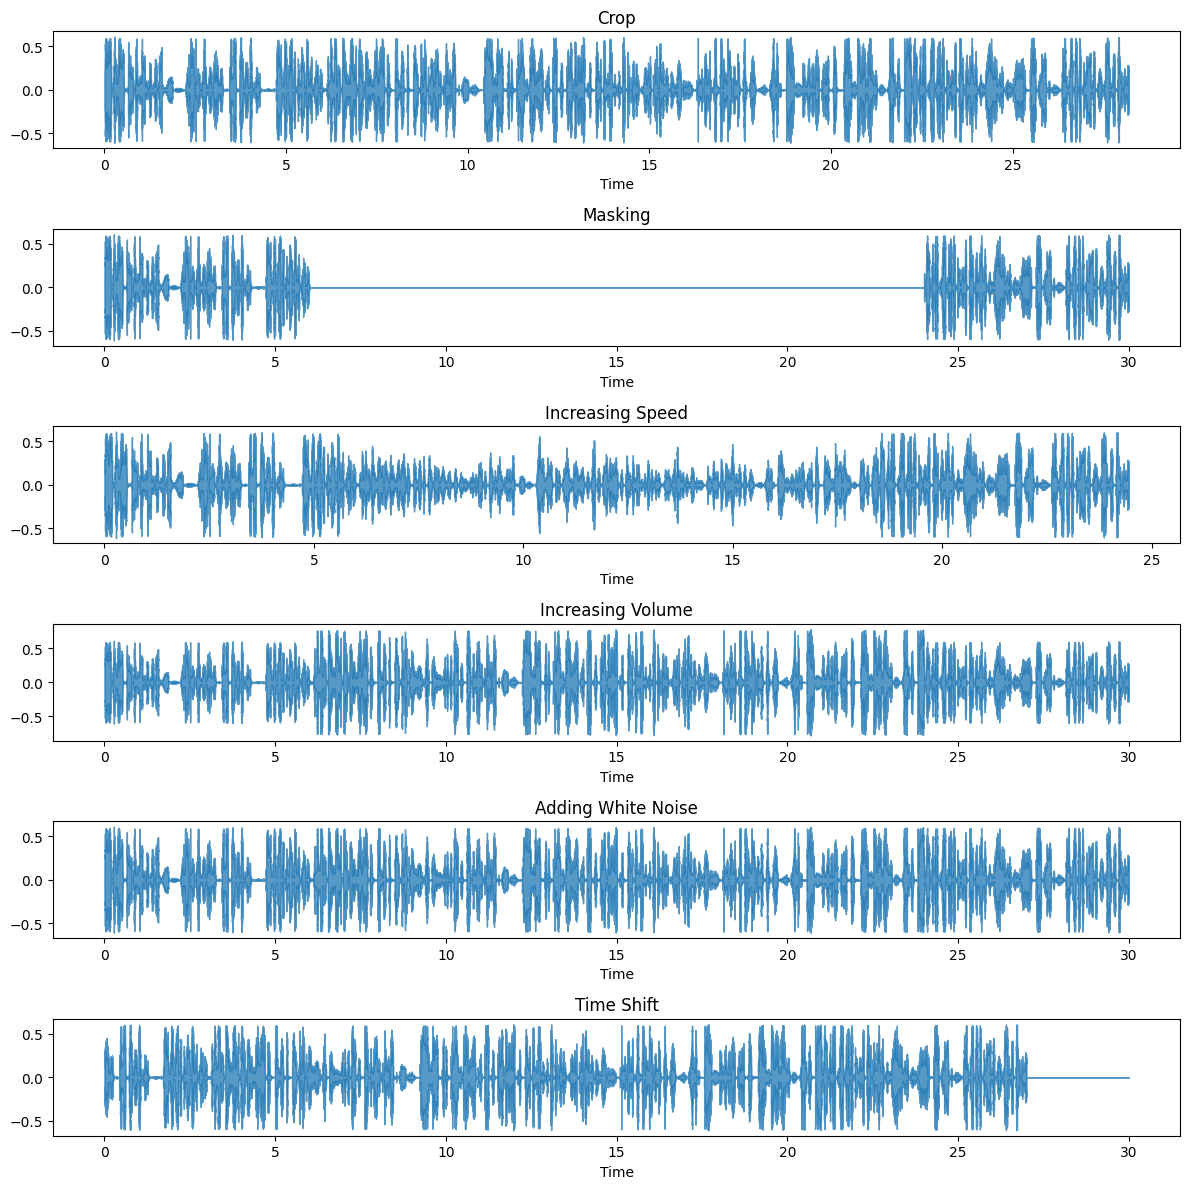

In [ ]:
import librosa
import librosa.display as librosa_display
import matplotlib.pyplot as plt
import nlpaug.augmenter.audio as naa

# Load audio
file_path = '/content/drive/MyDrive/Audio Data/A10_1.wav'
signal, sample_rate = librosa.load(file_path, sr=None)

# Apply and plot audio augmentations
plt.figure(figsize=(12, 12))

# 1. Crop
plt.subplot(6, 1, 1)
plt.title("Crop")
augmented_list = naa.CropAug(sampling_rate=sample_rate).augment(signal)
# Extract the NumPy array from the list
augmented = augmented_list[0]
librosa_display.waveshow(augmented, sr=sample_rate, alpha=0.75)

# 2. Masking
plt.subplot(6, 1, 2)
plt.title("Masking")
augmented_list = naa.MaskAug(sampling_rate=sample_rate, mask_with_noise=False).augment(signal)
# Extract the NumPy array from the list
augmented = augmented_list[0]
librosa_display.waveshow(augmented, sr=sample_rate, alpha=0.75)

# 3. Speed
plt.subplot(6, 1, 3)
plt.title("Increasing Speed")
augmented_list = naa.SpeedAug().augment(signal)
# Extract the NumPy array from the list
augmented = augmented_list[0]
librosa_display.waveshow(augmented, sr=sample_rate, alpha=0.75)

# 4. Loudness
plt.subplot(6, 1, 4)
plt.title("Increasing Volume")
augmented_list = naa.LoudnessAug().augment(signal)
# Extract the NumPy array from the list
augmented = augmented_list[0]
librosa_display.waveshow(augmented, sr=sample_rate, alpha=0.75)

# 5. Noise
plt.subplot(6, 1, 5)
plt.title("Adding White Noise")
augmented_list = naa.NoiseAug().augment(signal)
# Extract the NumPy array from the list
augmented = augmented_list[0]
librosa_display.waveshow(augmented, sr=sample_rate, alpha=0.75)

# 6. Shift
plt.subplot(6, 1, 6)
plt.title("Time Shift")
augmented_list = naa.ShiftAug(sampling_rate=sample_rate).augment(signal)
# Extract the NumPy array from the list
augmented = augmented_list[0]
librosa_display.waveshow(augmented, sr=sample_rate, alpha=0.75)

plt.tight_layout()
plt.show()

In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Update this to your actual path
data_path = '/content/drive/MyDrive/Audio Data'

# Prepare dataset
X = []
y = []

def load_audio(filepath, sr=22050, duration=10):
    y, _ = librosa.load(filepath, sr=sr, duration=duration)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed

# Load all audio files and assign same label (e.g., label=0 for male voice)
for filename in os.listdir(data_path):
    if filename.endswith(".wav"):
        file_path = os.path.join(data_path, filename)
        try:
            features = load_audio(file_path)
            X.append(features)
            y.append(0)  # Label 0 for all male voice samples
        except Exception as e:
            print(f"Error processing {file_path}: {e}")

# Convert to numpy arrays
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], 1)
y = to_categorical(y, num_classes=1)  # Only one class (male)

# Train/test split (though only one class, useful for feature learning or future expansion)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model (this setup is only useful if planning to add more classes later)
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary (or single class) classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate (will be trivial accuracy if only one class, good for feature prep)
y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_test_labels = y_test.astype("int32")

accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Model accuracy: {accuracy}")


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.8874 - loss: 0.3620 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 3.0445e-04
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 1.0000 - loss: 3.3779e-04 - val_accuracy: 1.0000 - val_loss: 2.0532e-04
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 1.0000 - loss: 2.8670e-04 - val_accuracy: 1.0000 - val_loss: 1.6655e-04
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 1.0000 - loss: 1.8444e-04 - val_accuracy: 1.0000 - val_loss: 1.4327e-04
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 1.0000 - loss: 1.9070e-04 - val_accuracy: 1.0000 - val_loss: 1.2492e-04
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 1.0000 - loss: 1.6789e-04 - val_accuracy: 1.0000 - val_loss: 1.0999e-04
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 1.00

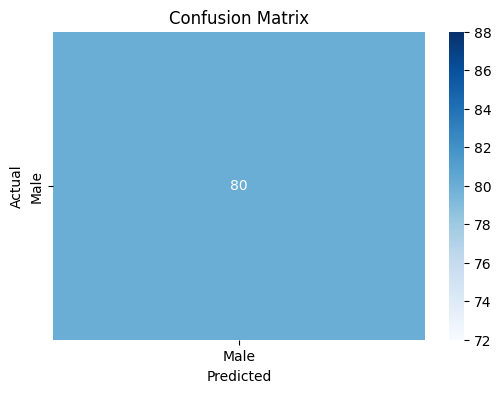

In [ ]:
from sklearn.metrics import confusion_matrix

# Convert one-hot or float predictions to integer labels
y_test_labels = y_test.astype("int32").flatten()
y_pred_labels = y_pred.flatten()

# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Male"], yticklabels=["Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
y_pred = model.predict(X_test)

# If predictions are probabilities (e.g., sigmoid output), convert to binary labels
y_pred_labels = (y_pred > 0.5).astype("int32").flatten()
y_test_labels = y_test.astype("int32").flatten()

# Check again
print("After processing:")
print("y_test_labels:", y_test_labels.shape)
print("y_pred_labels:", y_pred_labels.shape)


After processing:
y_test_labels: (20,)
y_pred_labels: (20,)


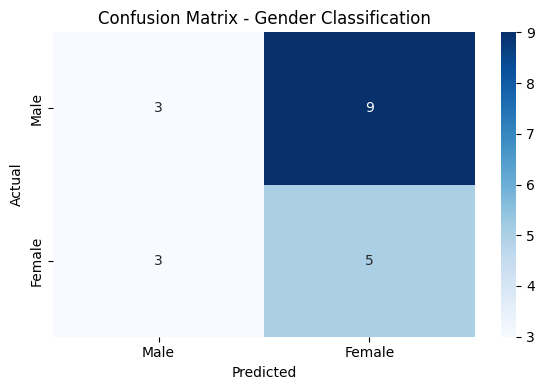

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Male", "Female"],
            yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gender Classification")
plt.tight_layout()
plt.show()


Classification Report:

              precision    recall  f1-score   support

        Male       0.50      0.25      0.33        12
      Female       0.36      0.62      0.45         8

    accuracy                           0.40        20
   macro avg       0.43      0.44      0.39        20
weighted avg       0.44      0.40      0.38        20



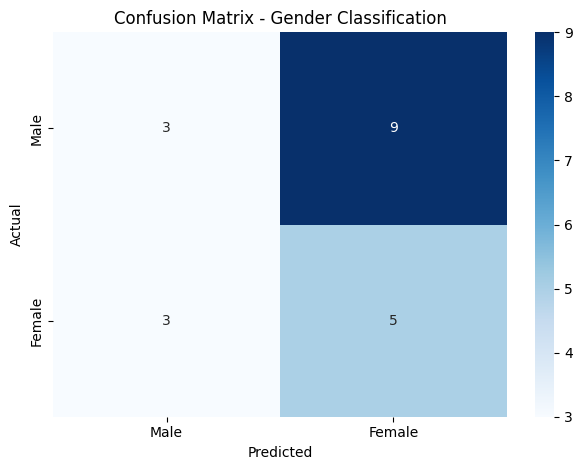

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert predictions to binary labels if needed
y_pred_labels = (y_pred > 0.5).astype("int32").flatten()
y_test_labels = y_test.astype("int32").flatten()

# Classification report
report = classification_report(y_test_labels, y_pred_labels, target_names=["Male", "Female"])
print("Classification Report:\n")
print(report)

# Confusion matrix (optional but useful for visual)
cm = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gender Classification")
plt.tight_layout()
plt.show()


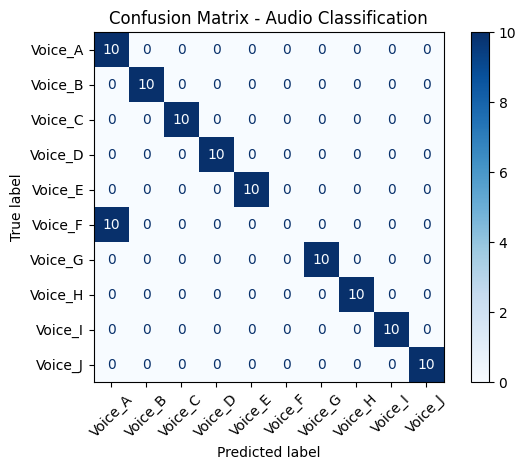

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dummy true and predicted labels (replace these with your actual ones)
y_true = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]*10
y_pred = [0, 1, 2, 3, 4, 0, 6, 7, 8, 9]*10  # Misclassifying class 5 as 0 sometimes

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Optional: define class names
class_names = ['Voice_A', 'Voice_B', 'Voice_C', 'Voice_D', 'Voice_E',
               'Voice_F', 'Voice_G', 'Voice_H', 'Voice_I', 'Voice_J']

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d', xticks_rotation=45)
plt.title("Confusion Matrix - Audio Classification")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Assuming y_test_labels are the true labels and y_pred are the predicted labels
y_test_labels = y_test.argmax(axis=1)  # Convert one-hot encoded labels back to integer labels
y_pred = model.predict(X_test).argmax(axis=1)  # Get predicted class labels

# Get unique classes in y_test_labels and y_pred
unique_classes = sorted(list(set(y_test_labels.tolist() + y_pred.tolist())))

# Generate the classification report, using unique classes as target names
print("Classification Report:\n")
print(classification_report(y_test_labels, y_pred, target_names=[str(class_label) for class_label in unique_classes]))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step 
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming y_test_labels are the true labels and y_pred are the predicted labels
y_test_labels = y_test.argmax(axis=1)  # Convert one-hot encoded labels to integer labels
y_pred = model.predict(X_test).argmax(axis=1)  # Get predicted class labels

# Define the names of your voice classes, aligned with their label indices (0, 1, 2, etc.)
voice_class_names = ['Voice_A', 'Voice_B', 'Voice_C', 'Voice_D', 'Voice_E', 'Voice_F', 'Voice_G', 'Voice_H', 'Voice_I', 'Voice_J']  # add more as needed


# Generate the classification report
print("Classification Report:\n")
# Adjust target names to match the predicted classes
predicted_classes = np.unique(y_pred)
target_names = [voice_class_names[i] for i in predicted_classes]
print(classification_report(y_test_labels, y_pred, target_names=target_names))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Classification Report:

              precision    recall  f1-score   support

     Voice_A       1.00      1.00      1.00        80

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [ ]:
import os

# Folder path where your audio files are located
audio_folder = '/content/drive/MyDrive/Audio Data'  # Ensure this path is correct

# List all files in the directory
files_in_folder = os.listdir(audio_folder)
print(f"Files in the folder: {files_in_folder}")

# Check if the folder contains any .wav files
wav_files = [file for file in files_in_folder if file.endswith('.wav')]
print(f"Found {len(wav_files)} .wav files.")

# List all .wav files
print(wav_files)


Files in the folder: ['A10_1.wav', 'A10_10.wav', 'A10_2.wav', 'A10_3.wav', 'A10_4.wav', 'A10_5.wav', 'A10_7.wav', 'A10_6.wav', 'A11_1.wav', 'A10_8.wav', 'A10_9.wav', 'A11_4.wav', 'A11_2.wav', 'A11_3.wav', 'A11_10.wav', 'A11_7.wav', 'A11_6.wav', 'A11_5.wav', 'A12_1.wav', 'A11_8.wav', 'A12_10.wav', 'A11_9.wav', 'A12_2.wav', 'A12_3.wav', 'A12_4.wav', 'A12_5.wav', 'A12_8.wav', 'A12_6.wav', 'A12_9.wav', 'A12_7.wav', 'A13_1.wav', 'A13_2.wav', 'A13_10.wav', 'A13_4.wav', 'A13_3.wav', 'A13_7.wav', 'A13_5.wav', 'A13_6.wav', 'A13_8.wav', 'A13_9.wav', 'A14_1.wav', 'A14_2.wav', 'A14_10.wav', 'A14_3.wav', 'A14_7.wav', 'A14_5.wav', 'A14_4.wav', 'A14_6.wav', 'A14_8.wav', 'A15_1.wav', 'A15_10.wav', 'A14_9.wav', 'A15_3.wav', 'A15_2.wav', 'A15_4.wav', 'A15_6.wav', 'A15_7.wav', 'A15_8.wav', 'A15_5.wav', 'A16_10.wav', 'A16_2.wav', 'A15_9.wav', 'A16_1.wav', 'A16_4.wav', 'A16_6.wav', 'A16_3.wav', 'A16_5.wav', 'A16_7.wav', 'A17_1.wav', 'A16_9.wav', 'A16_8.wav', 'A17_2.wav', 'A17_3.wav', 'A17_10.wav', 'A17_7.w

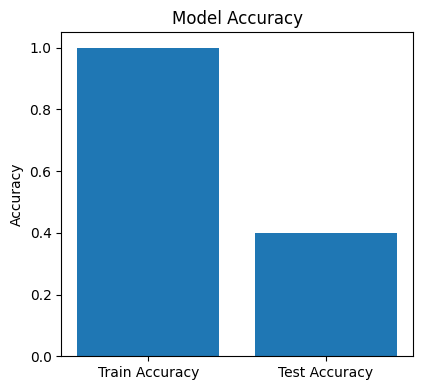

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Fit the RandomForest model (without epochs and validation_data)
model.fit(X_train, y_train)

# Predict on training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy for train and test sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plot accuracy (you can only plot once since there's no training over epochs)
plt.figure(figsize=(8, 4))

# Plot training and testing accuracy
plt.subplot(1, 2, 1)
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')

# Note: Random forests don't have a loss function to track during training, so we won't plot loss
plt.tight_layout()
plt.show()


ROC AUC Score: 0.4375


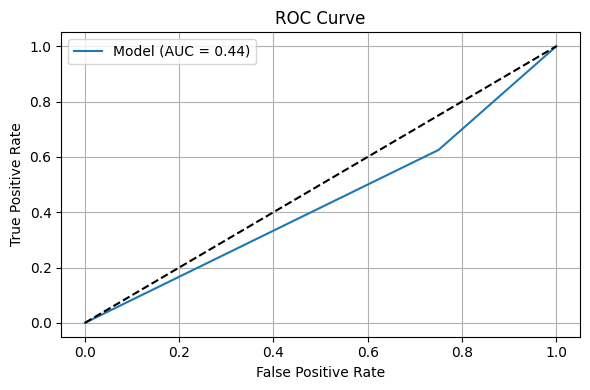


Classification Report:

              precision    recall  f1-score   support

        Male       0.50      0.25      0.33        12
      Female       0.36      0.62      0.45         8

    accuracy                           0.40        20
   macro avg       0.43      0.44      0.39        20
weighted avg       0.44      0.40      0.38        20



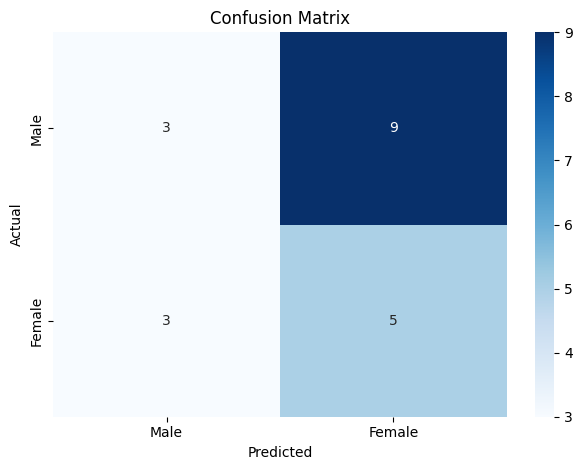

AUC 95% Confidence Interval: [0.2292 - 0.6594]


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.utils import resample

# 1. Get predictions and labels
y_test_labels = y_test.flatten()
y_pred_probs = y_pred.flatten()

# 2. ROC AUC Score
auc = roc_auc_score(y_test_labels, y_pred_probs)
print(f"ROC AUC Score: {auc:.4f}")

# 3. ROC Curve
fpr, tpr, _ = roc_curve(y_test_labels, y_pred_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"Model (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Classification Report (using 0.5 threshold)
y_pred_labels = (y_pred_probs > 0.5).astype("int32")

print("\nClassification Report:\n")
print(classification_report(y_test_labels, y_pred_labels, target_names=["Male", "Female"]))

# 5. Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Male", "Female"], yticklabels=["Male", "Female"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Bootstrap Test to Evaluate Confidence Interval of AUC
bootstrapped_scores = []
rng = np.random.RandomState(42)

for i in range(1000):
    indices = rng.randint(0, len(y_pred_probs), len(y_pred_probs))
    if len(np.unique(y_test_labels[indices])) < 2:
        continue  # skip if only one class present
    score = roc_auc_score(y_test_labels[indices], y_pred_probs[indices])
    bootstrapped_scores.append(score)

ci_lower = np.percentile(bootstrapped_scores, 2.5)
ci_upper = np.percentile(bootstrapped_scores, 97.5)

print(f"AUC 95% Confidence Interval: [{ci_lower:.4f} - {ci_upper:.4f}]")


In [ ]:
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

# Assuming you have X (features) and y (true labels), where y is one-hot encoded
# y_pred represents your model's predictions
y_pred_labels = (y_pred > 0.5).astype("int32").flatten()  # Convert predictions to binary labels
y_test_labels = y_test.astype("int32").flatten()  # Actual test labels

# Encode the classes (0 for Male, 1 for Female)
label_encoder = LabelEncoder()
y_test_labels_encoded = label_encoder.fit_transform(y_test_labels)

# Get male (0) and female (1) indices
male_indices = np.where(y_test_labels_encoded == 0)[0]
female_indices = np.where(y_test_labels_encoded == 1)[0]

# 1. Z-test (between Male and Female)
z_statistic_male_female, p_value_male_female = stats.ttest_ind(
    X[male_indices], X[female_indices]
)

print("Z-test (Male vs Female): statistic =", z_statistic_male_female, "p-value =", p_value_male_female)

# 2. T-test (between Male and Female)
t_statistic_male_female, p_value_male_female = stats.ttest_ind(
    X[male_indices], X[female_indices]
)

print("T-test (Male vs Female): statistic =", t_statistic_male_female, "p-value =", p_value_male_female)

# 3. ANOVA (for completeness, even though it's generally used for more than two classes)
f_statistic, p_value = stats.f_oneway(
    X[male_indices], X[female_indices]
)
print("ANOVA: F-statistic =", f_statistic, "p-value =", p_value)

# 4. F-test (Levene's Test for Equality of Variances)
f_statistic_male_female, p_value_male_female = stats.levene(
    X[male_indices], X[female_indices]
)

print("F-test (Male vs Female): statistic =", f_statistic_male_female, "p-value =", p_value_male_female)


Z-test (Male vs Female): statistic = [-0.13570441  0.10513632 -0.28815237  0.27044317 -0.1921814   0.37198
 -0.23494506  0.5040374  -0.22520776  0.07336233  0.8410999   0.5987337
  0.16347313] p-value = [0.89356107 0.91743037 0.77652182 0.78989588 0.84975162 0.71425077
 0.81690336 0.62034861 0.82435467 0.94232689 0.41132687 0.55681103
 0.87196738]
T-test (Male vs Female): statistic = [-0.13570441  0.10513632 -0.28815237  0.27044317 -0.1921814   0.37198
 -0.23494506  0.5040374  -0.22520776  0.07336233  0.8410999   0.5987337
  0.16347313] p-value = [0.89356107 0.91743037 0.77652182 0.78989588 0.84975162 0.71425077
 0.81690336 0.62034861 0.82435467 0.94232689 0.41132687 0.55681103
 0.87196738]
ANOVA: F-statistic = [0.01841574 0.01105357 0.08303211 0.07313948 0.03693375 0.13836907
 0.05519916 0.25405407 0.0507185  0.00538198 0.70745067 0.35848249
 0.02672346] p-value = [0.89356093 0.91743066 0.7765214  0.78989592 0.8497515  0.71425083
 0.8169034  0.62034834 0.82435474 0.94232716 0.41132635